<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div>

## ET5003_CS6134  Machine Learning Applications
## SEM1 2022/3

### ET5003_CS6134 Etivity 2 - Building a Bayesian Network on a Real-Life Scenario

### Instructor: Emil Vassev
October 3rd, 2022
<br><br>
Copyright (C) 2022 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: <span style="color:green">Paul</span>
### Student Surname: <span style="color:green">Trayers</span>
### Student ID: <span style="color:green">8907021</span>
### Date of Final Submission: <span style="color:green">December 10th, 2022</span>
***

### Task
In this e-tivity, you are asked to build a Bayesian Network by following the steps outlined in the interactive lesson “Notebook Lesson: Building Bayesian Networks with Python”. This Bayesian Network needs to cover a real-life scenario, which is a modified version of the “Recommendation Letter” example provided by the lectures.

## The real-life scenario
Let’s suppose that a UL student is taking the ET5003 module “Machine Learning Applications”. The student’s grade for this module will depend on their intelligence (low or high), module difficulty (easy, hard), and their health status (sick or healthy). Our student asks their professor for a recommendation letter. To come up with the idea of the quality of that recommendation letter (weak or strong), the professor can only look at the student’s grade (A, B or C) and the student’s forum activity (not active, active). Hence, the actual quality of the letter depends stochastically on the grade and on the forum activity.

### Here are the steps you need to follow:

A Bayesian Network is composed of two components:

1. A directed acyclic graph DAG: 𝓖(𝑉,𝐸)
   - Nodes 𝑉 represent a set of random variables.
   - Directed edges 𝐸 connect two random variables with causal probabilistic dependency.
   - Cycles are not allowed in the graph.

2. A set of conditional probability distributions
   - A conditional probability distribution is defined for each node in the graph.
   - The conditional probability distribution of a node (random variable) is defined for every possible outcome of the preceding causal node(s).

### Step 1.1. Describe the problem (5%)
Outline the problem in terms of:
<ul>
<li>random variables and their domain</li>
<li>dependencies among these random variables</li>
<ul>

The professor writes a recommendation **letter** of particular quality(observation/evidence)

The possible _independent_ causes of the **letter** are:
* **intelligence**
* **module difficulty**
* **health status**
* **grade**
* **forum activity**

Inference objectives:
* calculate the posterior probability of having a **grade** A given the observed evidence of a strong recommendation **letter**
* calculate the prior probability of having a strong recommendation **letter** without any evidence
* calculate the prior probability of having a strong recommendation **letter** with a weak **forum activity** as a prior evidence

The conditional probability formula, known as Bayes' Theorem, can be expressed as:

$$
P(\text{Cause} \mid \text{Evidence}) = \frac{P(\text{Evidence} \mid \text{Cause}) \times P(\text{Cause})}{P(\text{Evidence})}
$$

Where:
- $P(\text{Cause} \mid \text{Evidence})$ is the *Posterior* probability. It represents the probability of the Cause given the observed Evidence.
- $P(\text{Evidence} \mid \text{Cause})$ is the *Likelihood*. It is the probability of observing the Evidence given the Cause.
- $P(\text{Cause})$ is the *Prior* probability. It represents the initial belief about the Cause, before considering the Evidence.
- $P(\text{Evidence})$ is the *Evidence*. It is the probability of the Evidence under all possible causes.


### Step 1.2. Draw and show the DAG (7%)

In [ ]:
# your code goes here

### Step 1.3. Create the DAG of the Bayesian Network by using the pgmpy library (7%)

Here, we create the Recommendation Letter Bayesian Network following the inferences identified previously.

We consider five nodes, each representing a random variable:

* **module_difficulty**: {easy, hard}
* **intelligence**: {low or high}
* **grade**: {A, B, C}
* **health**: {sick, healthy}
* **forum_activity** {inactive, active}
* **letter**: {weak or strong}

Additional constraints:
module_difficulty ⊥ intelligence (independent)

In [7]:
#!pip install pgmpy

# show installed versions
#!pip show pgmpy
#!pip show networkx
#!pip show matplotlib

Name: pgmpy
Version: 0.1.24
Summary: A library for Probabilistic Graphical Models
Home-page: https://github.com/pgmpy/pgmpy
Author: Ankur Ankan
Author-email: ankurankan@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, networkx, numpy, opt-einsum, pandas, pyparsing, scikit-learn, scipy, statsmodels, torch, tqdm
Required-by: 
Name: networkx
Version: 3.2.1
Summary: Python package for creating and manipulating graphs and networks
Home-page: 
Author: 
Author-email: Aric Hagberg <hagberg@lanl.gov>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: hyperopt, lida, pgmpy, python-louvain, scikit-image, torch
Name: matplotlib
Version: 3.7.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.10/dist-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, p

In [11]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt

# Define the Bayesian DAG structure
#
# we define the Bayesian structure by connecting nodes (random variables)
# the direction is determined from the order of the nodes
#
# here, electricity_failure, computer_malfunction, and computer_failure are random variables

model = BayesianNetwork([
    ('grade', 'letter'),
    ('forum_activity', 'letter'),
    ('intelligence', 'grade'),
    ('module_difficulty', 'grade'),
    ('health', 'grade')])

### Step 1.4. Show the DAG of the Bayesian Network (1%)

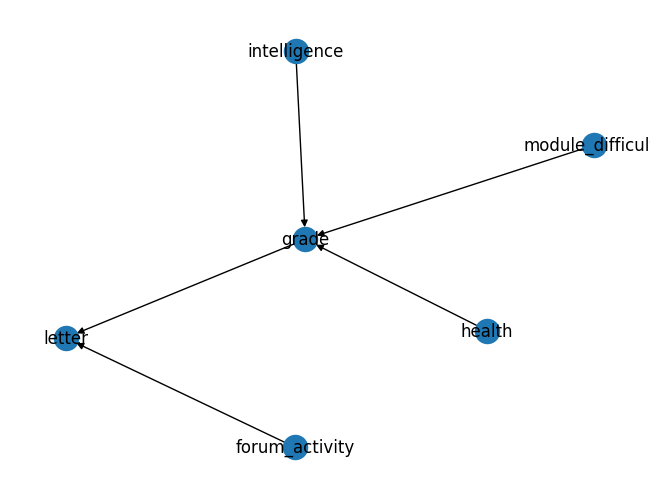

In [12]:
#nx.draw(model, with_labels=True)
# Convert BayesianNetwork to NetworkX graph
#nx_graph = model.to_networkx()

# Since NetworkX.draw() is no longer supported we need a different approach to drawing the graph.

# Create a NetworkX graph from the Bayesian Network
nx_graph = nx.DiGraph()
nx_graph.add_edges_from(model.edges())

# Plot using NetworkX
nx.draw(nx_graph, with_labels=True)

plt.show()
plt.close()

In this step, we build the distribution models per a random variable. We use our beliefs and logic to come up with these models as our _a priori_ knowledge.

## Step 2: Create the Conditional Probability Distributions of the Bayesian Network (50%)

### Step 2.1: Build the probability distribution tables with TabularCPD (46%)

Here we create the probability distributions for each of the random variables assigning values that we think might be reasonable for the scenario. In this way we emulate the initial input of a domain expert (a priori)

### CPT for `module_difficulty`
| Probability Description         | Value
| --- | --- |
| P(module_difficulty=easy) | 0.6 |
| P(module_difficulty=no) | 0.4 |

### CPT for `intelligence`
| Probability Description         | Value
| --- | --- |
| P(intelligence=low) | 0.7 |
| P(intelligence=high) | 0.3 |

### CPT for `health`
| Probability Description         | Value
| --- | --- |
| P(health=sick) | 0.3 |
| P(health=healthy) | 0.7 |

### CPT for `grade` given `module_difficulty`, `intelligence`, and `health`
| Condition | Probability |
| --- | --- |
| P(grade=A \| module_difficulty=easy ∩ intelligence=low ∩ health=sick) | 0.58 |
| P(grade=A \| module_difficulty=hard ∩ intelligence=low ∩ health=sick) | 0.43 |
| P(grade=A \| module_difficulty=easy ∩ intelligence=high ∩ health=sick) | 0.94 |
| P(grade=A \| module_difficulty=hard ∩ intelligence=high ∩ health=sick) | 0.7 |
| P(grade=A \| module_difficulty=easy ∩ intelligence=low ∩ health=healthy) | 0.61 |
| P(grade=A \| module_difficulty=hard ∩ intelligence=low ∩ health=healthy) | 0.46 |
| P(grade=A \| module_difficulty=easy ∩ intelligence=high ∩ health=healthy) | 0.952 |
| P(grade=A \| module_difficulty=hard ∩ intelligence=high ∩ health=healthy) | 0.73 |
| P(grade=B \| module_difficulty=easy ∩ intelligence=low ∩ health=sick) | 0.24 |
| P(grade=B \| module_difficulty=hard ∩ intelligence=low ∩ health=sick) | 0.15 |
| P(grade=B \| module_difficulty=easy ∩ intelligence=high ∩ health=sick) | 0.048 |
| P(grade=B \| module_difficulty=hard ∩ intelligence=high ∩ health=sick) | 0.18 |
| P(grade=B \| module_difficulty=easy ∩ intelligence=low ∩ health=healthy) | 0.27 |
| P(grade=B \| module_difficulty=hard ∩ intelligence=low ∩ health=healthy) | 0.18 |
| P(grade=B \| module_difficulty=easy ∩ intelligence=high ∩ health=healthy) | 0.042 |
| P(grade=B \| module_difficulty=hard ∩ intelligence=high ∩ health=healthy) | 0.21 |
| P(grade=C \| module_difficulty=easy ∩ intelligence=low ∩ health=sick) | 0.18 |
| P(grade=C \| module_difficulty=hard ∩ intelligence=low ∩ health=sick) | 0.42 |
| P(grade=C \| module_difficulty=easy ∩ intelligence=high ∩ health=sick) | 0.012 |
| P(grade=C \| module_difficulty=hard ∩ intelligence=high ∩ health=sick) | 0.12 |
| P(grade=C \| module_difficulty=easy ∩ intelligence=low ∩ health=healthy) | 0.12 |
| P(grade=C \| module_difficulty=hard ∩ intelligence=low ∩ health=healthy) | 0.36 |
| P(grade=C \| module_difficulty=easy ∩ intelligence=high ∩ health=healthy) | 0.006 |
| P(grade=C \| module_difficulty=hard ∩ intelligence=high ∩ health=healthy) | 0.06 |


### CPT for `forum_activity`
| Probability         | Value
| --- | --- |
| P(forum_activity=inactive) | 0.3 |
| P(forum_activity=active) | 0.7 |


### CPT for `letter` given `grade` and `forum_activity`
| Condition | Probability |
| --- | --- |
| P(letter=weak \| grade=A ∩ forum_activity=inactive) | 0.1 |
| P(letter=weak \| grade=B ∩ forum_activity=inactive) | 0.3 |
| P(letter=weak \| grade=C ∩ forum_activity=inactive) | 0.6 |
| P(letter=weak \| grade=A ∩ forum_activity=active) | 0.05 |
| P(letter=weak \| grade=B ∩ forum_activity=active) | 0.2 |
| P(letter=weak \| grade=C ∩ forum_activity=active) | 0.4 |
| P(letter=strong \| grade=A ∩ forum_activity=inactive) | 0.9 |
| P(letter=strong \| grade=B ∩ forum_activity=inactive) | 0.7 |
| P(letter=strong \| grade=C ∩ forum_activity=inactive) | 0.4 |
| P(letter=strong \| grade=A ∩ forum_activity=active) | 0.95 |
| P(letter=strong \| grade=B ∩ forum_activity=active) | 0.8 |
| P(letter=strong \| grade=C ∩ forum_activity=active) | 0.6 |


We use the TabularCPD class provided by the pgmpy library to build the distribution model of each random variable.

In [ ]:
# your code goes here

### Step 2.2: Associate the distribution models with the network structure (2%)

In [ ]:
# your code goes here

### Step 2.3: Check the model (2%)

In [ ]:
# your code goes here

## Step 3: Inference with the Bayesian Network (30%)

### Step 3.1: Infer Posterior Probability of having a grade A if the evidence is a strong recommendation letter (10%)

In [ ]:
# your code goes here

In [ ]:
# show the posterior probability results
# your code goes here

### Step 3.2: Infer Prior Probability of having a strong recommendation letter with no evidence (10%)

In [ ]:
# your code goes here

In [ ]:
# show the prior probability results
# your code goes here

### Step 3.3: Infer Prior Probability of having a strong recommendation letter with a weak forum activity as a prior evidence (10%)

In [ ]:
# your code goes here

In [ ]:
# show the prior probability results
# your code goes here